<a href="https://colab.research.google.com/github/TamaradosAnjos/TamaradosAnjos/blob/main/Gr%C3%A1ficos_para_an%C3%A1lises_e_opera%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mercado Financeiro
Gráficos para análises e operações

In [6]:
# Bibliotecas necessárias para análise e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

# Biblioteca yfinance para coletar dados do Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf 
yf.pdr_override ()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar duas variáveis: o dólar e o Índice Ibovespa. 
Como é o respectivo comportamento durante o ano de 2022?

[*********************100%***********************]  2 of 2 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f59fa9c08d0>,
      dtype=object)

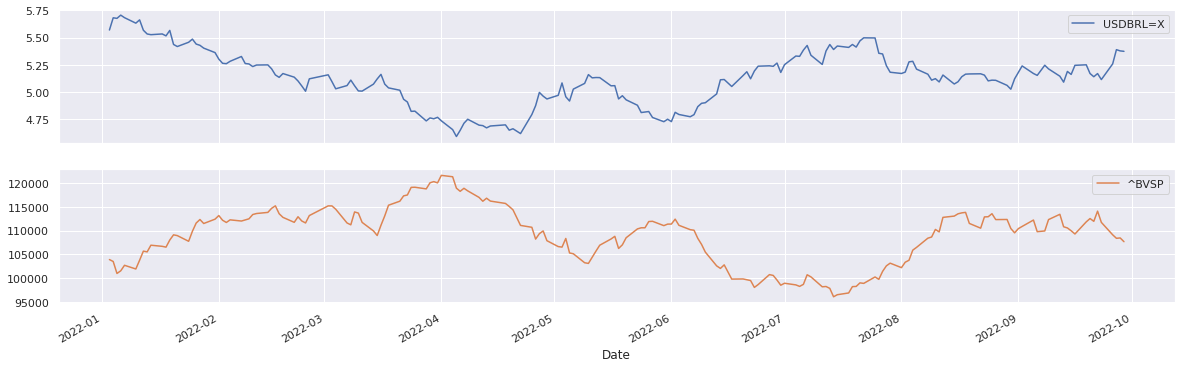

In [8]:
dolar_ibov = web.get_data_yahoo(['^BVSP', 'USDBRL=X'],
start = '2022-01-01',
end = '2022-09-30')['Close']
dolar_ibov = dolar_ibov.dropna()
sns.set()
dolar_ibov.plot(subplots = True, figsize = (20, 6))

Qual a correlação entre eles? 

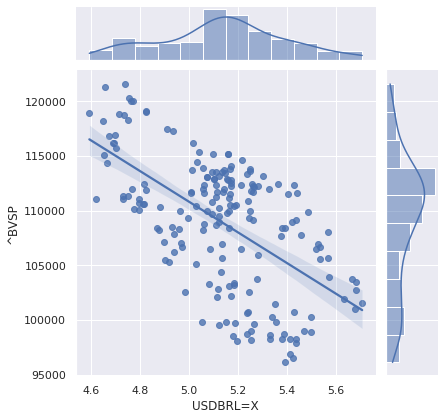

In [9]:
sns.jointplot(x = 'USDBRL=X', y = '^BVSP', data = dolar_ibov, kind = 'reg')

Vemos que há uma correlação negativa entre a duas, com uma dispersão dos dados, bem como a forma da distribuição de ambas as variáveis.

Como é a distribuição dos dados das variáveis?
No gráfico abaixo podemos estimar a densidade de probabilidade das duas variáveis. Vemos há grande densidade em uma área no
gráfico, com leve densidade abaixo.

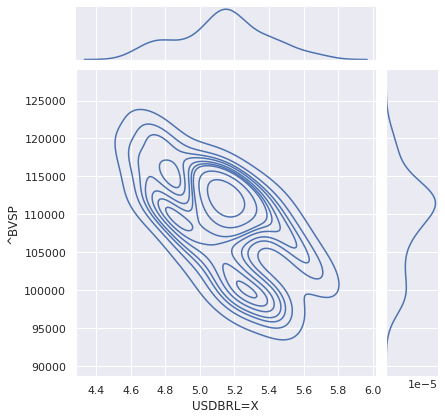

In [10]:
sns.jointplot(x = 'USDBRL=X', y = '^BVSP', data = dolar_ibov, kind = 'kde')

Em quais períodos as variáveis estavam positivamente ou negativamente correlacionadas?

#Gráfico de correlação móvel mensal

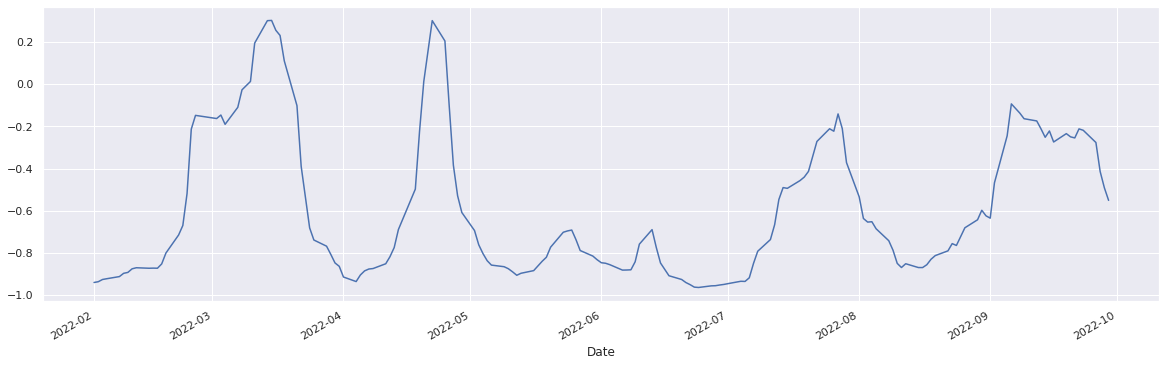

In [11]:
dolar_ibov['USDBRL=X'].rolling(22).corr(dolar_ibov['^BVSP']).plot(figsize = (20, 6))